<a href="https://colab.research.google.com/github/Aqfa07/ML-Project/blob/main/Project%202%3A%20Logistic%20Regression%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Learned parameters: weight = -0.709, bias = 0.008
True parameters: weight = -0.8, bias = 0.5


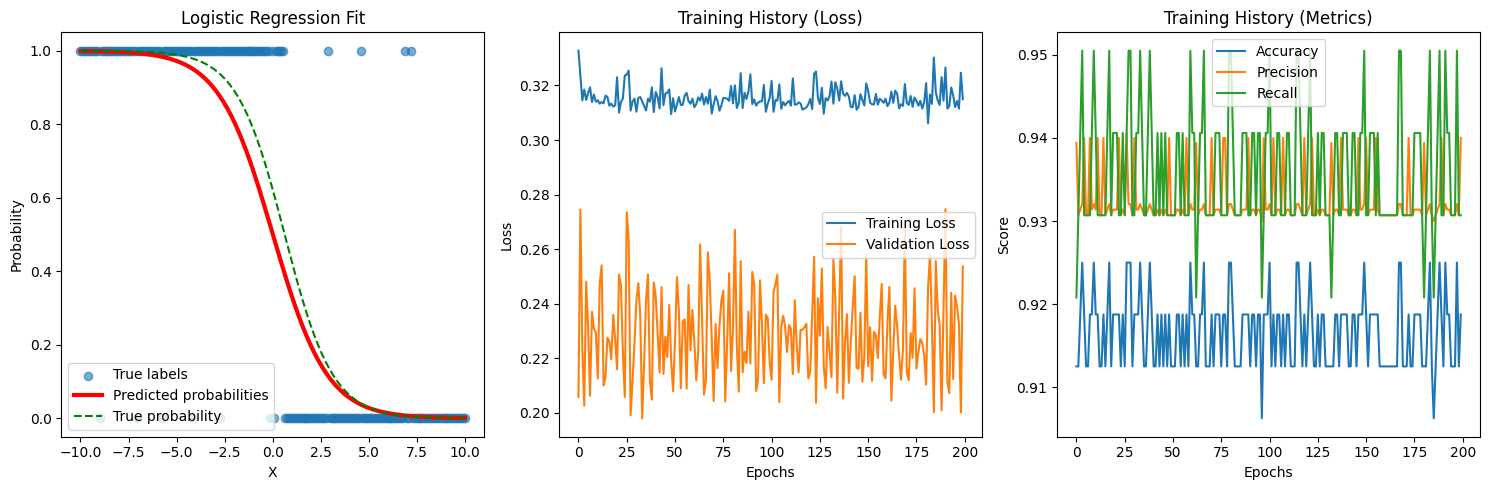


Final Evaluation:
Accuracy: 0.919
Precision: 0.940
Recall: 0.931


In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic binary classification data
np.random.seed(42)
X = np.linspace(-10, 10, 200).reshape(-1, 1).astype(np.float32)
true_logits = -0.8 * X + 0.5  # Adding some bias to make it more interesting
y = (1 / (1 + np.exp(-true_logits)) > 0.5)
y = y.astype(np.float32)

# Add some noise to make the problem more realistic
y = np.where(np.random.random(y.shape) < 0.05, 1 - y, y)  # Flip 5% of labels

# Create and compile the logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=[1])
])

# Use Adam optimizer with a reasonable learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

# Train the model with validation split
history = model.fit(
    X, y,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

# Predict probabilities and classes
probs = model.predict(X)
preds = (probs > 0.5).astype(np.float32)

# Get learned parameters
[w], [b] = model.layers[0].get_weights()
print(f"Learned parameters: weight = {w[0]:.3f}, bias = {b:.3f}")
print(f"True parameters: weight = -0.8, bias = 0.5")

# Create figure with multiple subplots
plt.figure(figsize=(15, 5))

# Plot 1: Data and predictions
plt.subplot(1, 3, 1)
plt.scatter(X, y, label='True labels', alpha=0.6)
plt.plot(X, probs, color='red', linewidth=3, label='Predicted probabilities')
plt.plot(X, 1 / (1 + np.exp(-true_logits)), '--', color='green', label='True probability')
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression Fit')
plt.legend()

# Plot 2: Training history (loss)
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History (Loss)')
plt.legend()

# Plot 3: Training history (metrics)
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['precision'], label='Precision')
plt.plot(history.history['recall'], label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Training History (Metrics)')
plt.legend()

plt.tight_layout()
plt.show()

# Print final evaluation
print("\nFinal Evaluation:")
print(f"Accuracy: {history.history['accuracy'][-1]:.3f}")
print(f"Precision: {history.history['precision'][-1]:.3f}")
print(f"Recall: {history.history['recall'][-1]:.3f}")